In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
DATAFOLDER = 'data'
movies_metadata = pd.read_table(DATAFOLDER + '/movie.metadata.tsv', 
                                names = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office', 'runtime', 'languages', 'countries', 'genres'])
character_metadata = pd.read_table(DATAFOLDER + '/character.metadata.tsv', 
                                names = ['movie_wikipedia_id', 'movie_freebase_id', 'movie_release_date', 'character_name', 'actor_birth_date', 'actor_gender', 
                                         'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'freebase_map_id', 'character_freebase_id', 
                                         'actor_freebase_id'])

movies_metadata['release_date'] = movies_metadata['release_date'].str[0:4].astype(float)

character_metadata['movie_release_date'] = character_metadata['movie_release_date'].str[0:4].astype(float)

In [4]:
movies_metadata

,wikipedia_id,freebase_id,name,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [5]:
character_metadata

,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
0,975900,/m/03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992.0,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992.0,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957.0,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


,Genre,Frequency
0,Science Fiction,3052
1,Superhero,306
2,Fantasy,3019
3,Time travel,88
4,Animation,3586
5,Black-and-white,9094
6,Silent film,5250


<BarContainer object of 7 artists>

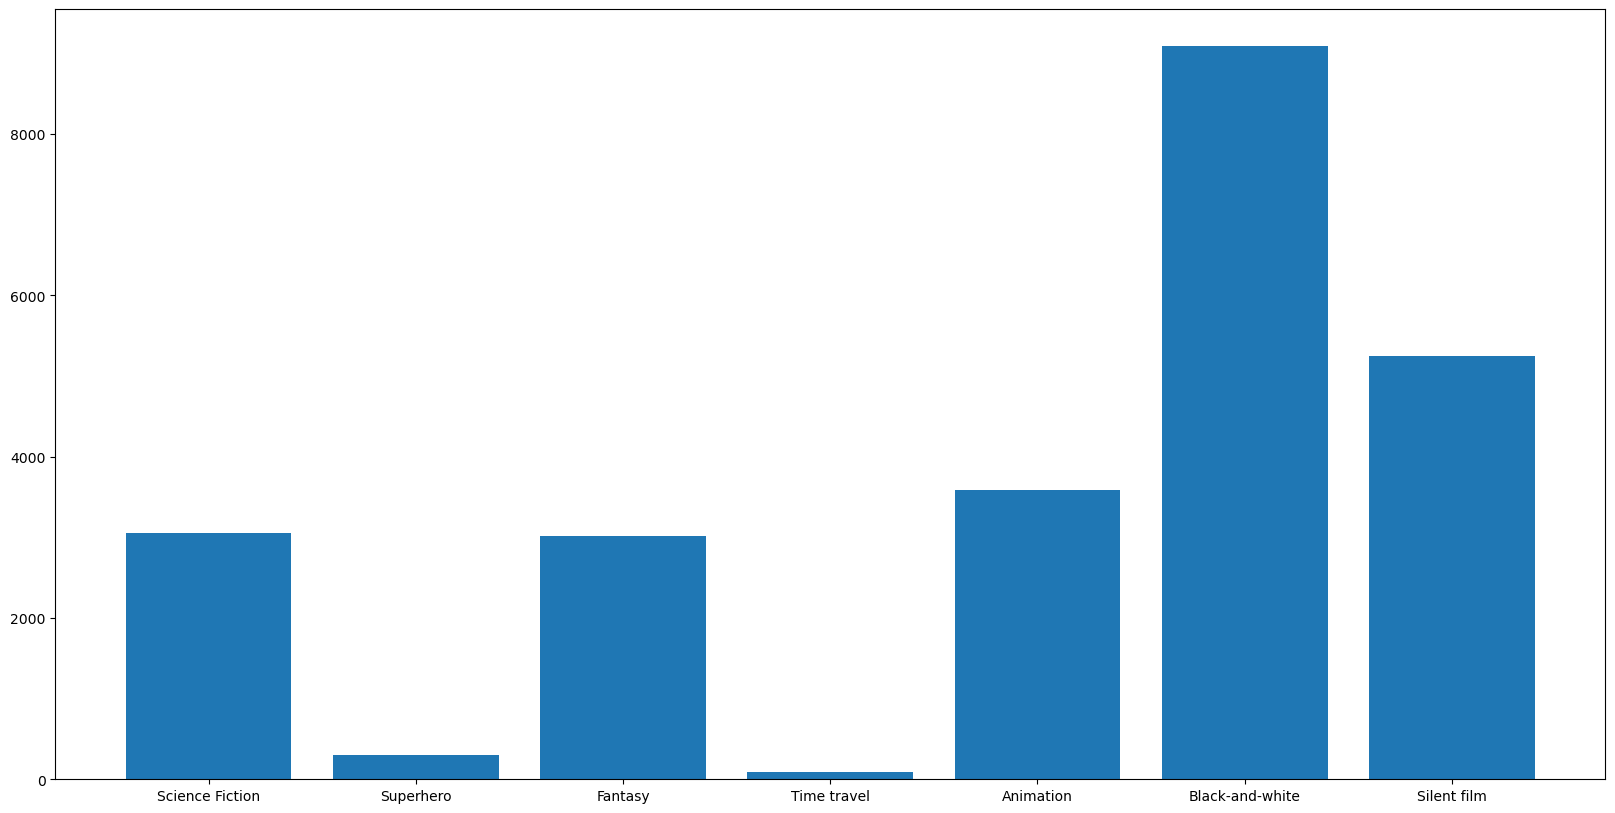

In [6]:
# Barplot of genres

movies_by_genre_raw = movies_metadata.copy().groupby(by = 'genres').apply(lambda x: pd.Series({'count' : x['genres'].count()}))

genres_tech = ['Science Fiction', 'Superhero', 'Fantasy', 'Time travel', 'Animation', 'Black-and-white', 'Silent film']

movies_by_genre = pd.DataFrame({'Genre': genres_tech,
                             'Frequency': [movies_by_genre_raw[movies_by_genre_raw.index.str.contains(genre)]['count'].sum() for genre in genres_tech]})

display(movies_by_genre)

plt.figure(figsize=(20, 10))
plt.bar(movies_by_genre.Genre, movies_by_genre.Frequency)


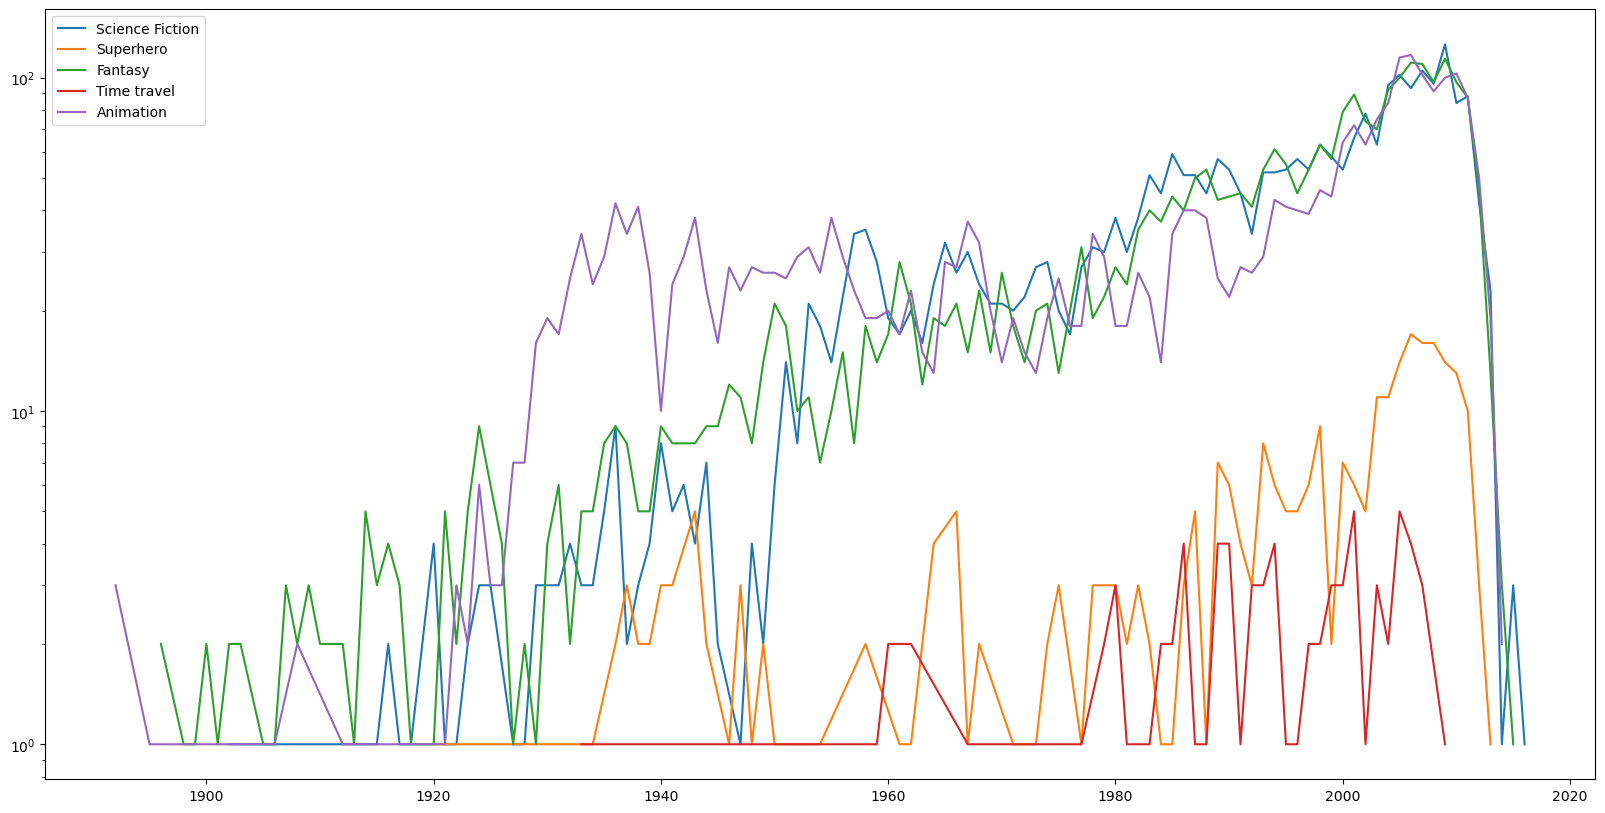

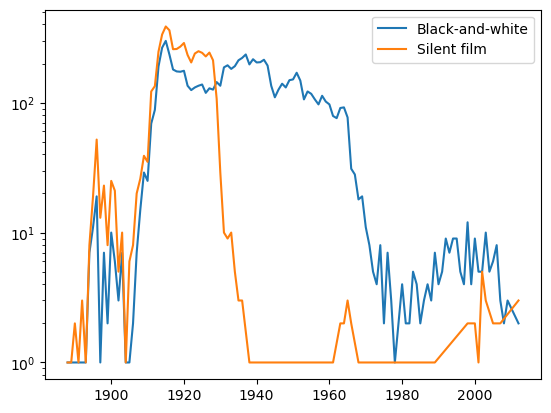

In [7]:
# Plot evolution of genres according to time

movie_dfs = []

plt.figure(figsize=(20, 10))

genres_1 = genres_tech[:len(genres_tech)-2]
genres_2 = genres_tech[len(genres_tech)-2:len(genres_tech)]

for genre in genres_1:
    df = movies_metadata[movies_metadata.genres.str.contains(genre)][['release_date', 'genres', 'box_office']]
    df_ = df.groupby(by = 'release_date').apply(lambda x: pd.Series({'frequency': x['genres'].count(),
                                                                        'box_office_avg' : x['box_office'].mean()}))
    plt.plot(df_.index , df_.frequency, label = genre)

    movie_dfs.append(df_)

plt.yscale('log')
plt.legend()
plt.show()

movies_by_year = movies_metadata.groupby(by='release_date').apply(lambda x: pd.Series({'count' : x['name'].count()}))

for genre in genres_2:
    df = movies_metadata[movies_metadata.genres.str.contains(genre)][['release_date', 'genres', 'box_office']]
    df_ = df.groupby(by = 'release_date').apply(lambda x: pd.Series({'frequency': x['genres'].count(),
                                                                        'box_office_avg' : x['box_office'].mean()}))
    plt.plot(df_.index , df_.frequency, label = genre)

    movie_dfs.append(df_)

plt.yscale('log')
plt.legend()
plt.show()
